# Video Game Dataset Analysis
### An exploration of video game sales from 1980 to 2020
The data can be found on Kaggle at [this link](https://www.kaggle.com/datasets/gregorut/videogamesales)

<img src="pacman.webp" width=800>

<img src="consolespic.png" width=600>

### Table of Contents

Step 1: [Data and Library Import](#Step-1:-Data-and-Library-Import)

Step 2: [Dataset Examination](#Step-2:-Dataset-Examination)

Step 3: [Feature Engineering](#Step-3:-Feature-Engineering)

Step 4: [Exploratory Data Analysis](#Step-4:-Exploratory-Data-Analysis)

## Step 1: Data and Library Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import seaborn as sns

with open("vgsales.csv", "r") as f:
    df = pd.read_csv(f)

## Step 2: Dataset Examination

In [2]:
# Let's set some options to make our dataset more readable

pd.set_option('display.float_format', lambda x: '%.2f' %x)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.00,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.00,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.shape

(16598, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.00,16327.00,16598.00,16598.00,16598.00,16598.00,16598.00
mean,8300.61,2006.41,0.26,0.15,0.08,0.05,0.54
std,4791.85,5.83,0.82,0.51,0.31,0.19,1.56
min,1.00,1980.00,0.00,0.00,0.00,0.00,0.01
25%,4151.25,2003.00,0.00,0.00,0.00,0.00,0.06
50%,8300.50,2007.00,0.08,0.02,0.00,0.01,0.17
75%,12449.75,2010.00,0.24,0.11,0.04,0.04,0.47
max,16600.00,2020.00,41.49,29.02,10.22,10.57,82.74


In [6]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
df['Year'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [8]:
df['Year'].nunique()

39

In [9]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [10]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <ul>
    <li>There are some Null values in the Year and Publisher columns</li>
        <ul>
        <li>These values only make up a small percentage of the total number of observations so it's ok to drop them</li>
    </ul>
    <li>The Year column's data type is float, let's change that to int or datetime</li>
</ul>
</div>


    



## Step 3: Feature Engineering

### Let's start by isolating the Null values

In [11]:
yearnan = df[df['Year'].isnull()].reset_index()
yearnan

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
1,377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
2,431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
3,470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
4,607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
266,16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
267,16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
268,16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
269,16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [12]:
pubnan = df[df['Publisher'].isnull()].reset_index()
pubnan

,index,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
1,1303,1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.00,0.10,1.46
2,1662,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.00,Misc,NaN,0.87,0.32,0.00,0.02,1.21
3,2222,2224,Bentley's Hackpack,GBA,2005.00,Misc,NaN,0.67,0.25,0.00,0.02,0.93
4,3159,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.00,Misc,NaN,0.46,0.17,0.00,0.01,0.64
5,3166,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.00,Misc,NaN,0.46,0.17,0.00,0.01,0.64
6,3766,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.00,Misc,NaN,0.38,0.14,0.00,0.01,0.53
7,4145,4147,Sonic the Hedgehog,PS3,NaN,Platform,NaN,0.00,0.48,0.00,0.00,0.48
8,4526,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.00,Misc,NaN,0.31,0.11,0.00,0.01,0.43
9,4635,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004.00,Misc,NaN,0.30,0.11,0.00,0.01,0.42


### Now let's drop them

In [13]:
df = df.dropna(how='any', axis=0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Now let's change the datatype for year

In [15]:
df['Year'] = df['Year'].astype(int)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


<div class="alert alert-success">
  <strong>Summary of Actions</strong>
    <li>All Null values have been dropped</li>
    <li>Since we only have a year measurement for time, there's no reason to use the datetime library. Int will be a sufficient data type for our analysis.</li>
</div>


    



## Step 4: Exploratory Data Analysis

<div class="alert alert-warning">
  <strong>Analysis Plan</strong>
    <h6>Let's break up the analysis into 5 main parts:</h6>
    <ol>
        <li>Publisher Performance</li>
        <li>Genre Performance</li>
        <li>Year Performance</li>
        <li>Platform Performance</li>
        <li>Sales Performance</li>
  </ol>
</div>


    



# 1) Publisher Performance

### Who were the Top 10 Publishers and how many games did they make?

In [17]:
df['Publisher'].value_counts().head(10)

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

In [18]:
top_10_pubs = df.groupby(['Publisher'])['Publisher'].count().sort_values(ascending=False).head(10)
top_10_pubs

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             632
Take-Two Interactive             412
Name: Publisher, dtype: int64

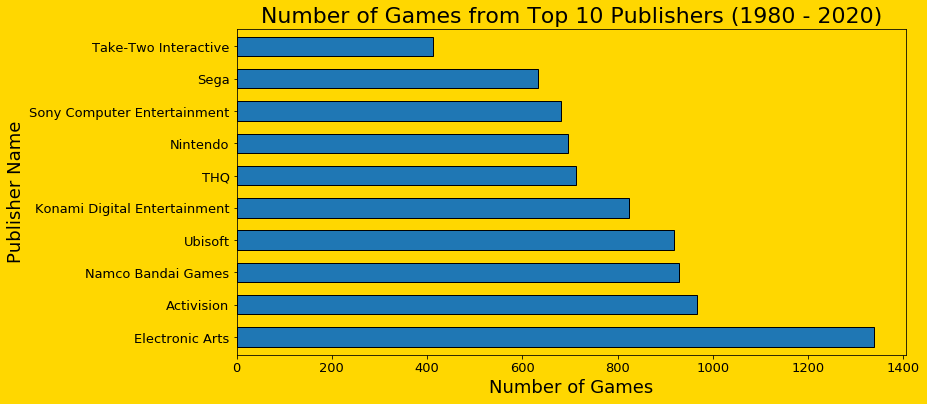

In [19]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_pubs.plot(kind='barh', width=0.6, edgecolor='k')
plt.xlabel('Number of Games', fontsize=18)
plt.ylabel('Publisher Name', fontsize=18)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Number of Games from Top 10 Publishers (1980 - 2020)', fontsize=22)
plt.show()

### What were the top 10 most prolific years for publishers and how many games did they make?

In [20]:
top_10_pub_year = df.groupby(['Year', 'Publisher'])

In [21]:
t10py = top_10_pub_year['Publisher'].size().sort_values(ascending=False).head(10)
t10py

Year  Publisher      
2009  Activision         121
2008  Electronic Arts    120
2005  Electronic Arts    117
2008  Ubisoft            112
2009  Electronic Arts    112
2007  Electronic Arts    107
2006  Electronic Arts    102
2009  Ubisoft            102
2010  Activision          89
2008  Activision          88
Name: Publisher, dtype: int64

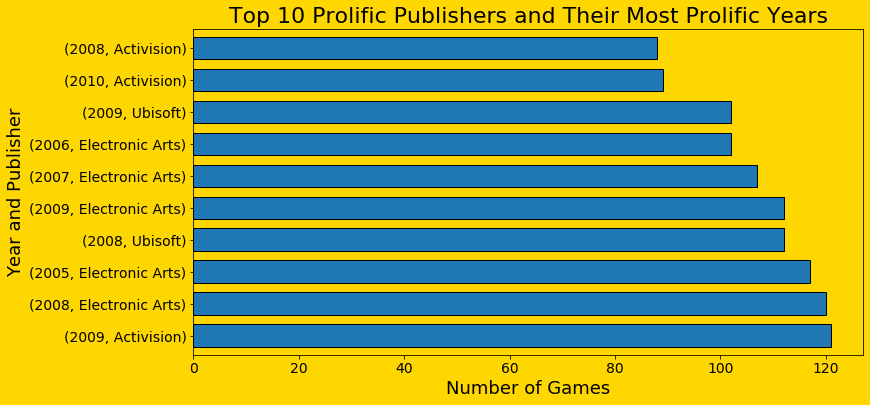

In [22]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
t10py.plot(kind='barh', width=0.7, edgecolor='k')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of Games', fontsize=18)
plt.ylabel('Year and Publisher', fontsize=18)
plt.title('Top 10 Prolific Publishers and Their Most Prolific Years', fontsize=22)
plt.show()

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Electronic Arts and Activision were the top game publishers during this period</li>
    <li>However, the most prolific years all came at the end of the 2000's and were dominated by EA, Activision, and Ubisoft</li>
</div>


    



# 2) Genre Performance

### What were the top Genres?

In [23]:
df['Genre'].value_counts()

Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: Genre, dtype: int64

In [24]:
df['Genre'].value_counts(normalize=True)

Action         0.20
Sports         0.14
Misc           0.10
Role-Playing   0.09
Shooter        0.08
Adventure      0.08
Racing         0.08
Platform       0.05
Simulation     0.05
Fighting       0.05
Strategy       0.04
Puzzle         0.03
Name: Genre, dtype: float64

<div class="alert alert-danger">
  <strong>The pie chart labels need to be fixed</strong>
    </div>


    



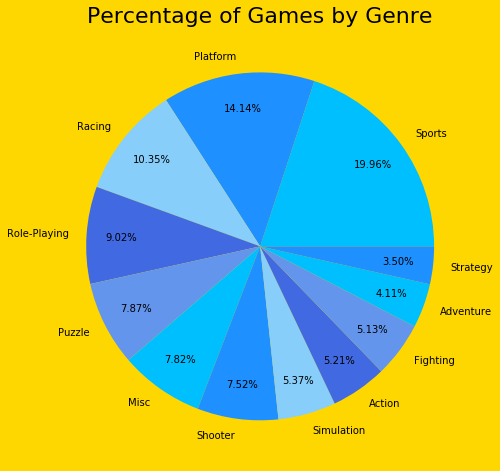

In [25]:
plt.figure(figsize=(8,8), facecolor='gold')
colors = ['deepskyblue', 'dodgerblue', 'lightskyblue', 'royalblue', 'cornflowerblue']
plt.pie(df['Genre'].value_counts(), labels=df['Genre'].unique(), colors=colors, autopct='%1.2f%%', pctdistance=.8)
plt.title('Percentage of Games by Genre', fontsize=22)
plt.show()

In [26]:
top_genres = df.groupby(['Genre'])['Genre'].count().sort_values(ascending=False).head(10)
top_genres

Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Name: Genre, dtype: int64

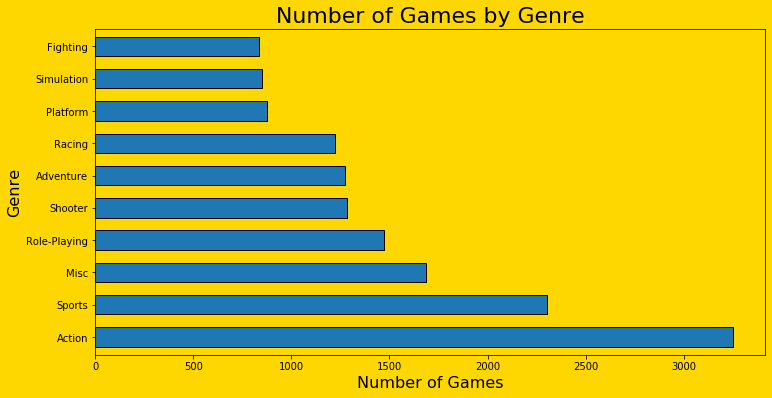

In [27]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_genres.plot(kind='barh', width=0.6, edgecolor='k')
plt.xlabel('Number of Games', fontsize=16)
plt.ylabel('Genre', fontsize=16)
plt.title('Number of Games by Genre', fontsize=22)
#plt.tight_layout()
plt.show()

In [28]:
top_10_year_genre = df.groupby(['Year'])

In [29]:
t10yg = top_10_year_genre['Genre'].value_counts().sort_values(ascending=False).head(10)

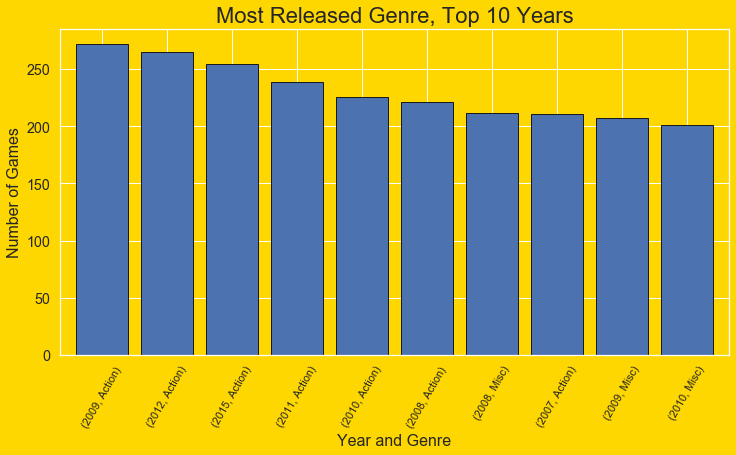

In [105]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
t10yg.plot(kind='bar', width=0.8, edgecolor='k')
plt.xticks(fontsize=11, rotation=60)
plt.xlabel('Year and Genre', fontsize=16)
plt.ylabel('Number of Games', fontsize=16)
plt.title('Most Released Genre, Top 10 Years', fontsize=22)
plt.show()

In [102]:
top_genre_year = df.groupby(['Year','Genre']).size().sort_values(ascending=False).reset_index(name='Count').head(5)
#top_genre_year = top_genre_year.rename(columns={0:'Number of Games'})
top_genre_year

,Year,Genre,Count
0,2009,Action,272
1,2012,Action,265
2,2015,Action,255
3,2011,Action,239
4,2010,Action,226


<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Action, Sports, Misc, and RPGs account for more than half of all games.</li>
    <li>Action games were consistently the most released genre in years where the most games were released except for a couple where Misc games were.</li>
</div>

# 3) Year Performance

### What Years Had the Most Releases?

In [36]:
df['Year'].value_counts()

2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
2012     655
2015     614
2014     580
2013     546
2001     482
1998     379
2000     349
2016     342
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [37]:
top_10_years = df.groupby(['Year'])['Year'].count().sort_values(ascending=False).head(10).astype(int)
top_10_years

Year
2009    1431
2008    1428
2010    1257
2007    1201
2011    1136
2006    1008
2005     936
2002     829
2003     775
2004     744
Name: Year, dtype: int64

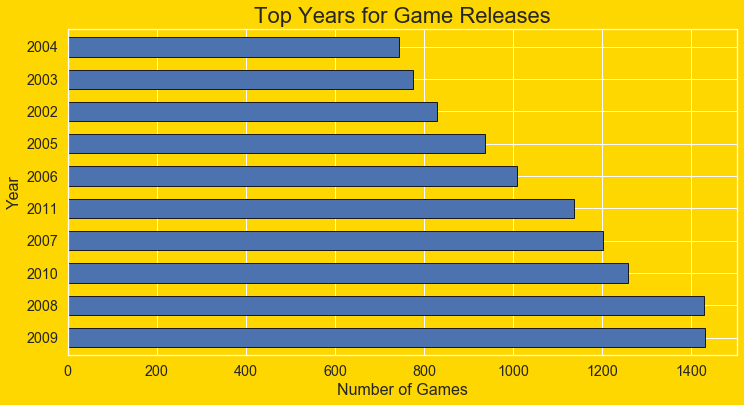

In [104]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_10_years.plot(kind='barh', width=0.6, edgecolor='k')
plt.xlabel('Number of Games', fontsize=16)
plt.ylabel('Year', fontsize=16)
plt.title('Top Years for Game Releases', fontsize=22)
plt.show()

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>The 2000s (but especially the latter half) saw the highest number of game releases, in addition to 2011.</li>
</div>

# 4) Platform Performance

### Which Platforms Had the Most Games?

In [39]:
df['Platform'].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [40]:
top_platforms = df.groupby(['Platform'])['Platform'].count().sort_values(ascending=False).head(10)
top_platforms

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
Name: Platform, dtype: int64

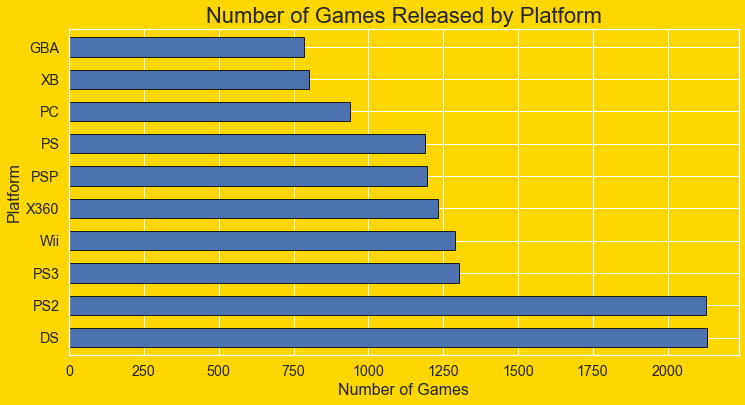

In [103]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_platforms.plot(kind='barh', width=0.6, edgecolor='k')
plt.xlabel('Number of Games', fontsize=16)
plt.ylabel('Platform', fontsize=16)
plt.title('Number of Games Released by Platform', fontsize=22)
plt.show()

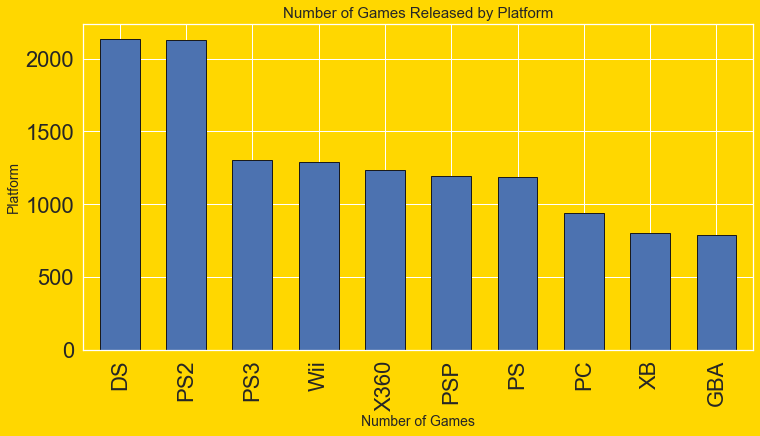

In [42]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_platforms.plot(kind='bar', width=0.6, edgecolor='k')
plt.xlabel('Number of Games', fontsize=14)
plt.ylabel('Platform', fontsize=14)
plt.title('Number of Games Released by Platform', fontsize=15)
plt.show()

<div class="alert alert-warning">
  <strong>Summary of Findings</strong>
    <li>Nintendo DS and Playstation 2 had nearly double the amount of games as their closest competitors.</li>
</div>

# 5) Sales Performance

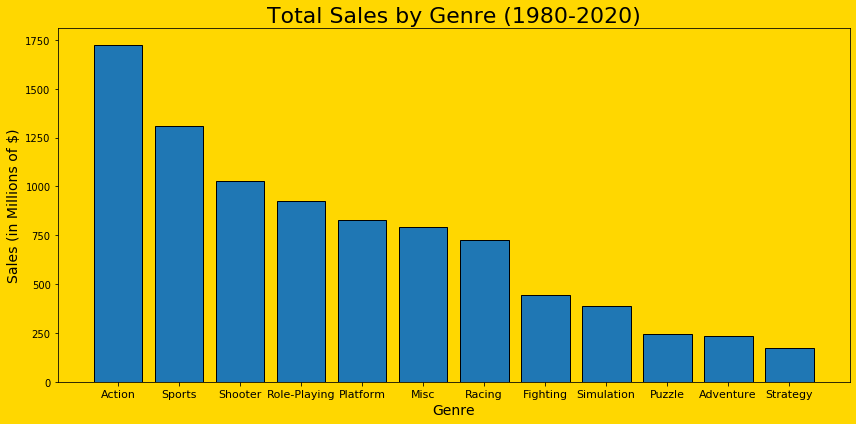

In [33]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
plt.bar(genre_sales['Genre'], genre_sales['Global_Sales'], width=0.8, edgecolor='k')
plt.xticks(fontsize=11)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Sales (in Millions of $)', fontsize=14)
plt.title('Total Sales by Genre (1980-2020)', fontsize=22)
plt.tight_layout()
plt.show()

In [34]:
comp_genre = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_genre_map = comp_genre.groupby(by=['Genre']).sum()

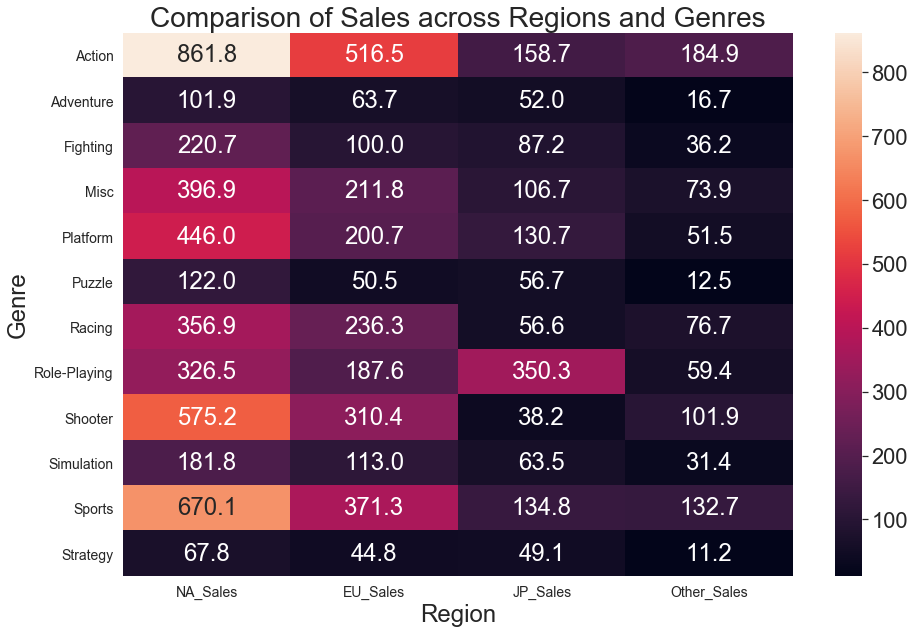

In [35]:
plt.figure(figsize=(15,10))
sns.set(font_scale=2)
sns.heatmap(comp_genre_map, annot=True, fmt='.1f')

plt.xlabel('Region')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Comparison of Sales across Regions and Genres', fontsize=28)
plt.show()

In [47]:
top_10_year_genre_sales = df.groupby(['Year', 'Genre'])

In [48]:
t10ygs = top_10_year_genre_sales['Global_Sales'].sum().sort_values(ascending=False).head(10)
t10ygs

Year  Genre  
2009  Action    139.36
      Sports    138.52
2008  Action    136.39
2006  Sports    136.16
2013  Action    125.22
2012  Action    122.01
2011  Action    118.96
2010  Action    117.64
2007  Action    106.50
2011  Shooter    99.36
Name: Global_Sales, dtype: float64

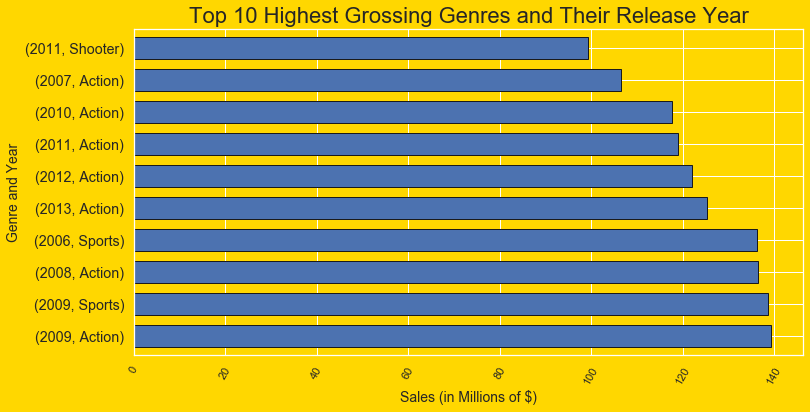

In [49]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
t10ygs.plot(kind='barh', width=0.7, edgecolor='k')
plt.xticks(fontsize=11, rotation=60)
plt.xlabel('Sales (in Millions of $)', fontsize=14)
plt.ylabel('Genre and Year', fontsize=14)
plt.title('Top 10 Highest Grossing Genres and Their Release Year', fontsize=22)
plt.show()

<div class="alert alert-warning">
  <strong>Summary of Findings (Genre)</strong>
    <li>Nintendo DS and Playstation 2 had nearly double the amount of games as their closest competitors.</li>
</div>

In [43]:
platform_sales = df.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending=False).reset_index().head(10)
platform_sales

,Platform,Global_Sales
0,PS2,1233.46
1,X360,969.60
2,PS3,949.35
3,Wii,909.81
4,DS,818.91
5,PS,727.39
6,GBA,305.62
7,PSP,291.71
8,PS4,278.10
9,PC,254.70


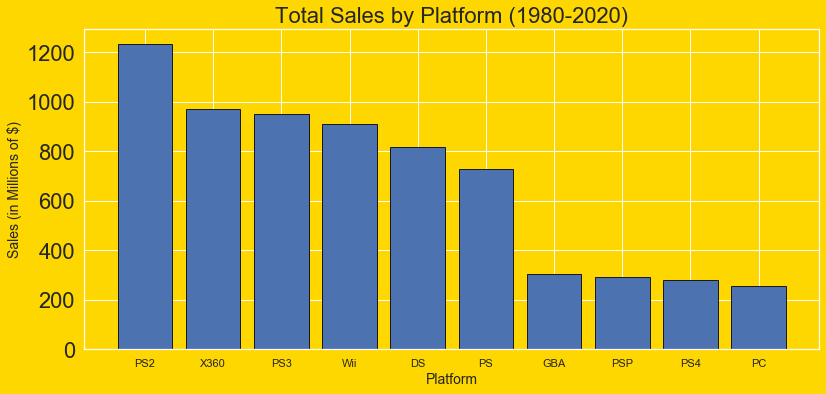

In [44]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
plt.bar(platform_sales['Platform'], platform_sales['Global_Sales'], width=0.8, edgecolor='k')
plt.xticks(fontsize=11)
plt.xlabel('Platform', fontsize=14)
plt.ylabel('Sales (in Millions of $)', fontsize=14)
plt.title('Total Sales by Platform (1980-2020)', fontsize=22)
plt.tight_layout()
plt.show()

In [45]:
comp_platform = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_plat_map = comp_platform.groupby(by=['Platform']).sum()

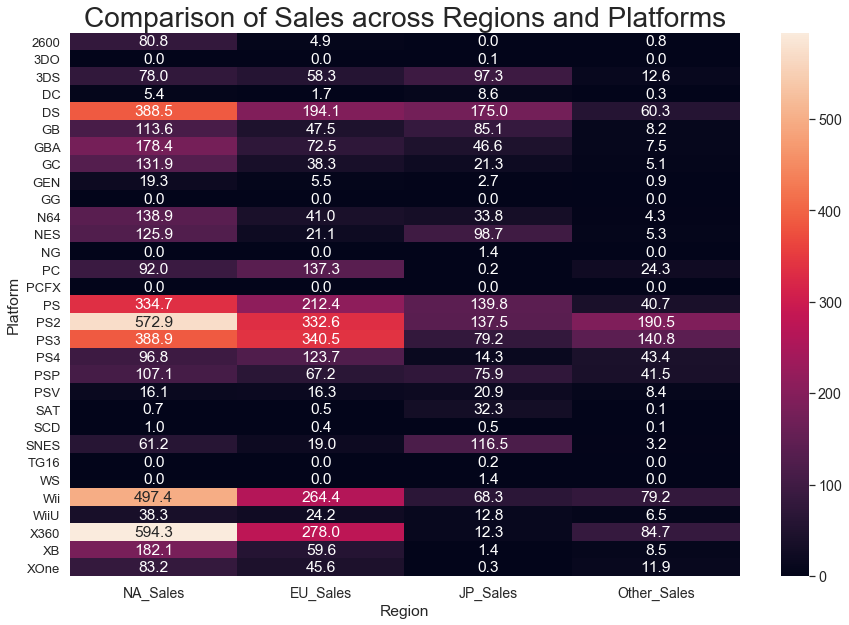

In [46]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.3)
sns.heatmap(comp_plat_map, annot=True, fmt='.1f')

plt.xlabel('Region')
plt.xticks(fontsize=14)
plt.yticks(fontsize=13)
plt.title('Comparison of Sales across Regions and Platforms', fontsize=28)
plt.show()

In [32]:
genre_sales = df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False).reset_index()
genre_sales

,Genre,Global_Sales
0,Action,1722.84
1,Sports,1309.24
2,Shooter,1026.20
3,Role-Playing,923.83
4,Platform,829.13
5,Misc,789.87
6,Racing,726.76
7,Fighting,444.05
8,Simulation,389.98
9,Puzzle,242.21


In [50]:
top_pub_sales = df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).reset_index().head(10)
top_pub_sales

,Publisher,Global_Sales
0,Nintendo,1784.43
1,Electronic Arts,1093.39
2,Activision,721.41
3,Sony Computer Entertainment,607.28
4,Ubisoft,473.54
5,Take-Two Interactive,399.30
6,THQ,340.44
7,Konami Digital Entertainment,278.56
8,Sega,270.70
9,Namco Bandai Games,253.65


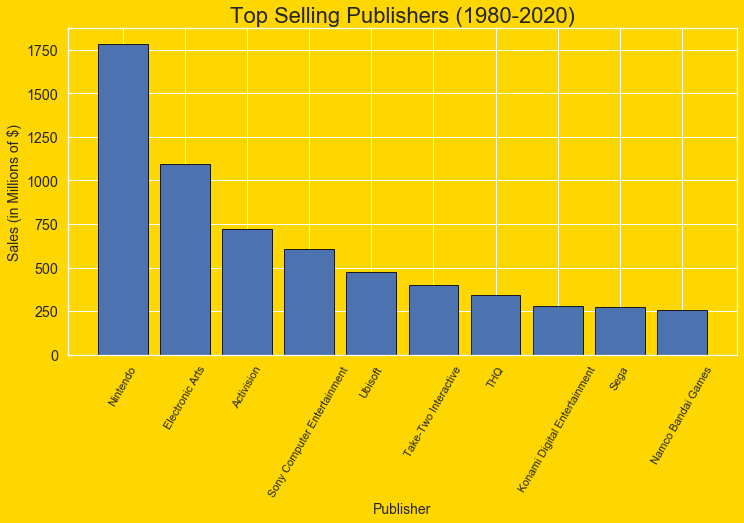

In [51]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
plt.bar(top_pub_sales['Publisher'], top_pub_sales['Global_Sales'], width=0.8, edgecolor='k')
plt.xticks(fontsize=11, rotation=60)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Sales (in Millions of $)', fontsize=14)
plt.title('Top Selling Publishers (1980-2020)', fontsize=22)
plt.show()

In [52]:
top_games = df.groupby(['Name'])['Global_Sales'].max().sort_values(ascending=False).reset_index().head(10)
top_games

,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,30.01
7,Wii Play,29.02
8,New Super Mario Bros. Wii,28.62
9,Duck Hunt,28.31


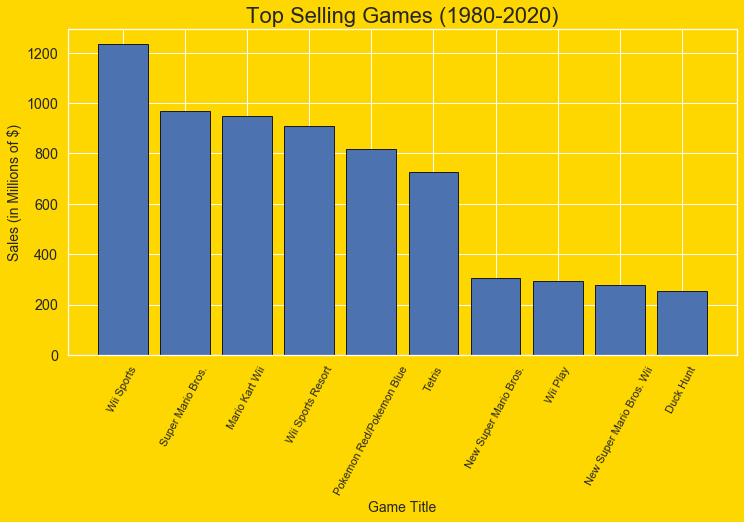

In [53]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
plt.bar(top_games['Name'], platform_sales['Global_Sales'], width=0.8, edgecolor='k')
plt.xticks(fontsize=11, rotation=62)
plt.xlabel('Game Title', fontsize=14)
plt.ylabel('Sales (in Millions of $)', fontsize=14)
plt.title('Top Selling Games (1980-2020)', fontsize=22)
plt.show()

In [54]:
top_sellers = df.groupby(['Name','Year'])['Global_Sales'].sum().sort_values(ascending=False).head(10)
top_sellers

Name                            Year
Wii Sports                      2006   82.74
Super Mario Bros.               1985   40.24
Grand Theft Auto V              2013   37.78
Mario Kart Wii                  2008   35.82
Wii Sports Resort               2009   33.00
Pokemon Red/Pokemon Blue        1996   31.37
Call of Duty: Modern Warfare 3  2011   30.83
Tetris                          1989   30.26
New Super Mario Bros.           2006   30.01
Call of Duty: Black Ops II      2012   29.72
Name: Global_Sales, dtype: float64

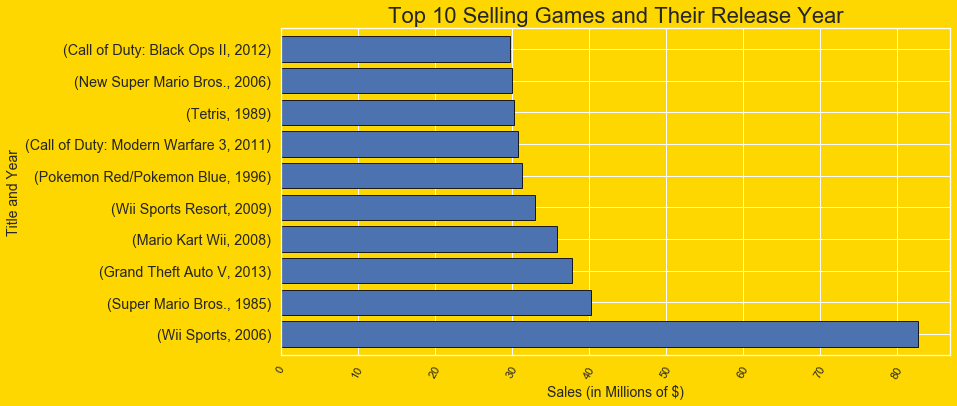

In [55]:
plt.rcParams.update({'axes.facecolor':'gold'})
plt.figure(figsize=(12,6), facecolor='gold')
top_sellers.plot(kind='barh', width=0.8, edgecolor='k')
plt.xticks(fontsize=11, rotation=60)
plt.xlabel('Sales (in Millions of $)', fontsize=14)
plt.ylabel('Title and Year', fontsize=14)
plt.title('Top 10 Selling Games and Their Release Year', fontsize=22)
plt.show()

In [56]:
df.head(100)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Crash Bandicoot 2: Cortex Strikes Back,PS,1997,Platform,Sony Computer Entertainment,3.78,2.17,1.31,0.31,7.58
96,97,Super Mario Bros. 2,NES,1988,Platform,Nintendo,5.39,1.18,0.70,0.19,7.46
97,98,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,Nintendo,3.24,1.35,2.42,0.43,7.45
98,99,Call of Duty: World at War,X360,2008,Shooter,Activision,4.79,1.90,0.00,0.69,7.37


In [57]:
df['Global_Sales'].describe()

count   16291.00
mean        0.54
std         1.57
min         0.01
25%         0.06
50%         0.17
75%         0.48
max        82.74
Name: Global_Sales, dtype: float64

- I want to take a look at some continuous data now. It looks the IQR for Global Sales is betweeen 0.06 and .48 but the max is 82.74. Sounds like we've got a fair amount of outliers. Let's take a look 

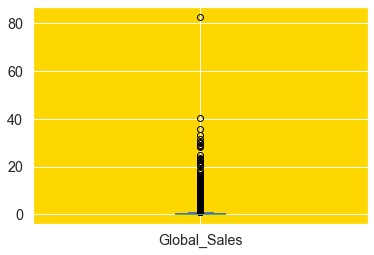

In [58]:
df['Global_Sales'].plot(kind='box')

- This is difficult to read and seemingly chiefly due to at least one outlier. Let's try to make it more informative by filtering the data

In [59]:
df1 = df[df['Global_Sales'] < 10]

In [60]:
df1.shape

(16229, 11)

In [61]:
df1['Global_Sales'].describe()

count   16229.00
mean        0.47
std         0.89
min         0.01
25%         0.06
50%         0.17
75%         0.47
max         9.88
Name: Global_Sales, dtype: float64

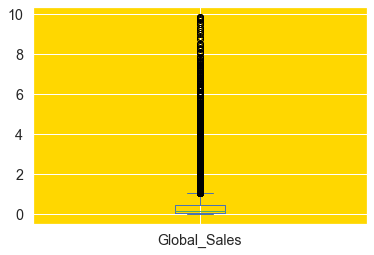

In [62]:
df1['Global_Sales'].plot(kind='box')

- Better! But let's filter it further still

In [63]:
df2 = df[df['Global_Sales'] < 2]

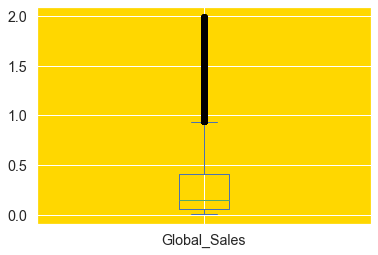

In [64]:
df2['Global_Sales'].plot(kind='box')

In [65]:
df2.shape

(15450, 11)

### Note
- We've cut down the data to include only games that have $2,000,000 or less in global sales, which is still 15,450 rows

- The overwhelming majority of games don't clear $1,000,000 in global sales
- This could be because there are games from as far back as 1980 when video games weren't as popular as they are today

In [66]:
sorted(df['Year'].unique())

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2020]

- Let's bisect this into pre- and post-2000 to see how games have sold over time

In [67]:
pre2000 = df[df['Year'] < 2000]
pre2000

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
12,13,Pokemon Gold/Pokemon Silver,GB,1999,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.10
...,...,...,...,...,...,...,...,...,...,...,...
16379,16382,Grand Prix Legends,PC,1997,Racing,Vivendi Games,0.00,0.01,0.00,0.00,0.01
16436,16439,Worms 2,PC,1997,Strategy,Microprose,0.00,0.01,0.00,0.00,0.01
16506,16509,Samurai Shodown: Warrios Rage,PS,1999,Fighting,SNK,0.01,0.00,0.00,0.00,0.01
16554,16557,Psychic Detective,PS,1995,Adventure,Electronic Arts,0.01,0.00,0.00,0.00,0.01


In [68]:
post2000 = df[df['Year'] >= 2000]
post2000

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


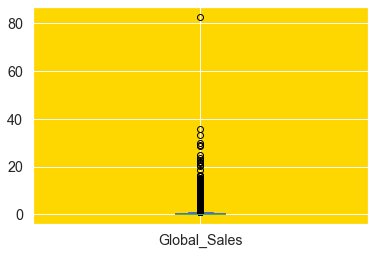

In [69]:
post2000['Global_Sales'].plot(kind='box')

- Even in the 2000s there still seems to be a fair amount of outliers

In [70]:
post2000.sort_values(by='Global_Sales', ascending=False)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
...,...,...,...,...,...,...,...,...,...,...,...
16182,16185,Princess Arthur,PSP,2013,Misc,Idea Factory,0.00,0.00,0.01,0.00,0.01
16183,16186,Sakura-Sou no Pet na Kanojo,PSP,2013,Adventure,Kadokawa Games,0.00,0.00,0.01,0.00,0.01
16184,16187,Fatal Fury: Battle Archives Volume 2 (JP sales),PS2,2007,Fighting,SNK Playmore,0.00,0.00,0.01,0.00,0.01
16185,16188,Tantei Jinguuji Saburo: Hai to Diamond,PSP,2009,Adventure,Arc System Works,0.00,0.00,0.01,0.00,0.01


- Just scrolling through the data we can see that there are only 62 games that sold more than $10,000,000 globally

In [71]:
post2000['Global_Sales'].describe()

count   14317.00
mean        0.50
std         1.47
min         0.01
25%         0.06
50%         0.16
75%         0.45
max        82.74
Name: Global_Sales, dtype: float64

In [72]:
post2000.shape

(14317, 11)

- It also looks like most of the games in this dataset came out during and after the year 2000 (14,317 out of 16,291)

- Let's try separating them out by decade and see what that looks like

In [73]:
df['Year'].dtype

dtype('int64')

In [74]:
df1980s = df.loc[(df.Year >= 1980) & (df.Year < 1990)]
df1990s = df.loc[(df.Year >= 1990) & (df.Year < 2000)]
df2000s = df.loc[(df.Year >= 2000) & (df.Year < 2010)]
df2010s = df.loc[(df.Year >= 2010) & (df.Year < 2020)]

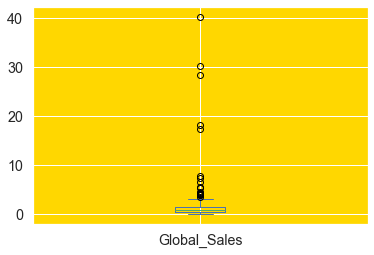

In [75]:
df1980s['Global_Sales'].plot(kind='box')
plt.show()

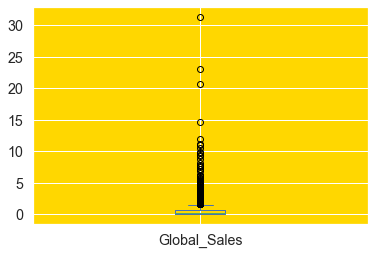

In [76]:
df1990s['Global_Sales'].plot(kind='box')
plt.show()

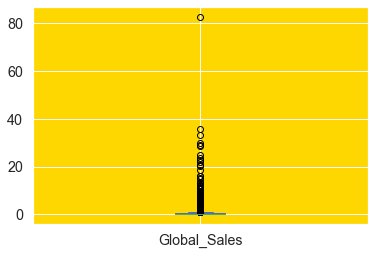

In [77]:
df2000s['Global_Sales'].plot(kind='box')
plt.show()

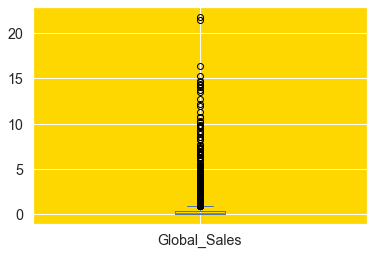

In [78]:
df2010s['Global_Sales'].plot(kind='box')
plt.show()

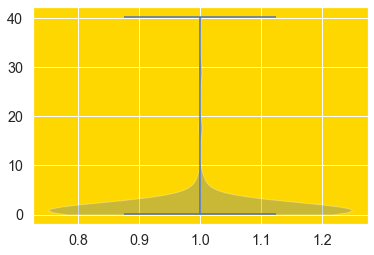

In [79]:
plt.violinplot(df1980s['Global_Sales'])
plt.show()

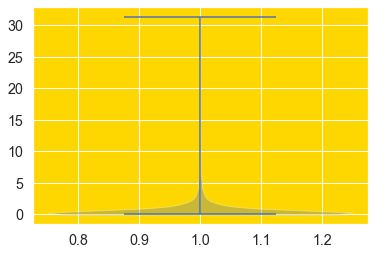

In [80]:
plt.violinplot(df1990s['Global_Sales'])
plt.show()

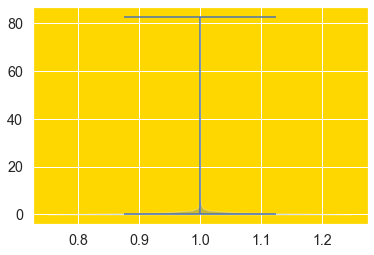

In [81]:
plt.violinplot(df2000s['Global_Sales'])
plt.show()

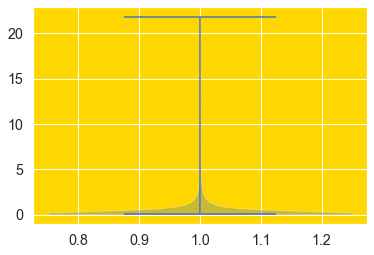

In [82]:
plt.violinplot(df2010s['Global_Sales'])
plt.show()

- The violinplots do a better job of illustrating this phenomenon. Let's try with North American sales

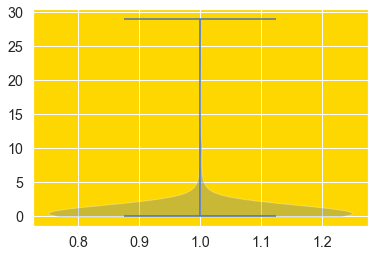

In [83]:
plt.violinplot(df1980s['NA_Sales'])
plt.show()

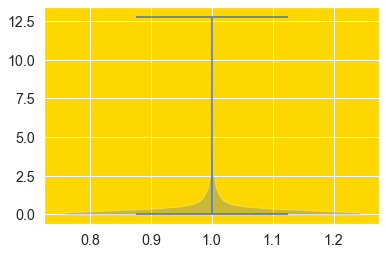

In [84]:
plt.violinplot(df1990s['NA_Sales'])
plt.show()

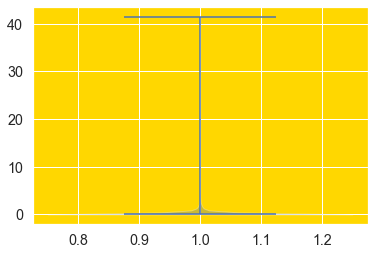

In [85]:
plt.violinplot(df2000s['NA_Sales'])
plt.show()

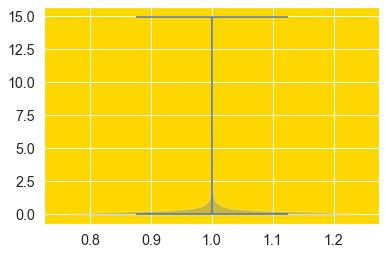

In [86]:
plt.violinplot(df2010s['NA_Sales'])
plt.show()

- Pretty much the same result. It seems that with video games you either have a hit franchise or hope to break even on the cost of development

In [87]:
top_sales_reg = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
top_sales_reg = top_sales_reg.sum().reset_index()
top_sales_reg = top_sales_reg.rename(columns={'index':'Region', 0:'Sales'})
top_sales_reg

,Region,Sales
0,NA_Sales,4327.65
1,EU_Sales,2406.69
2,JP_Sales,1284.27
3,Other_Sales,788.91


In [88]:
labels = top_sales_reg['Region']
size = top_sales_reg['Sales']

In [89]:
top_sales_fig = top_sales_reg.groupby(['Region'])['Sales'].sum().sort_values(ascending=False).head(10)
top_sales_fig

Region
NA_Sales      4327.65
EU_Sales      2406.69
JP_Sales      1284.27
Other_Sales    788.91
Name: Sales, dtype: float64

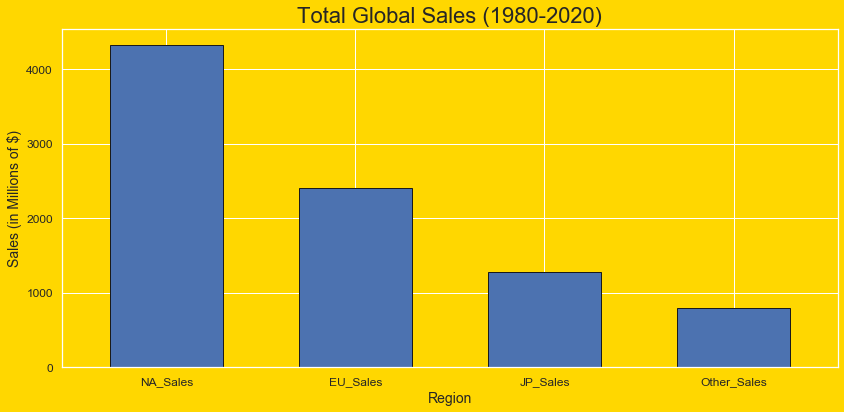

In [90]:
plt.figure(figsize=(12,6), facecolor='gold')
top_sales_fig.plot(kind='bar', width=0.6, edgecolor='k')
plt.xlabel('Region', fontsize=14)
plt.ylabel('Sales (in Millions of $)', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title('Total Global Sales (1980-2020)', fontsize=22)
plt.tight_layout()
plt.show()

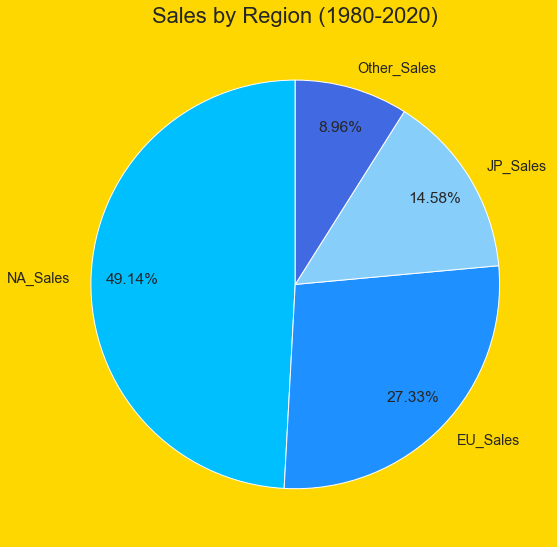

In [91]:
plt.figure(figsize=(8,8), facecolor='gold')
colors = ['deepskyblue', 'dodgerblue', 'lightskyblue', 'royalblue', 'cornflowerblue']
plt.pie(size, labels=labels, colors=colors, autopct='%1.2f%%', pctdistance=.8, startangle=90)
plt.title('Sales by Region (1980-2020)', fontsize=22)
plt.tight_layout()
plt.show()

In [92]:
top_sales_yearGB = df.groupby(['Year'])['Global_Sales'].sum().sort_values(ascending=False).head(5)
top_sales_yearGB

Year
2008   678.90
2009   667.30
2007   609.92
2010   600.29
2006   521.04
Name: Global_Sales, dtype: float64

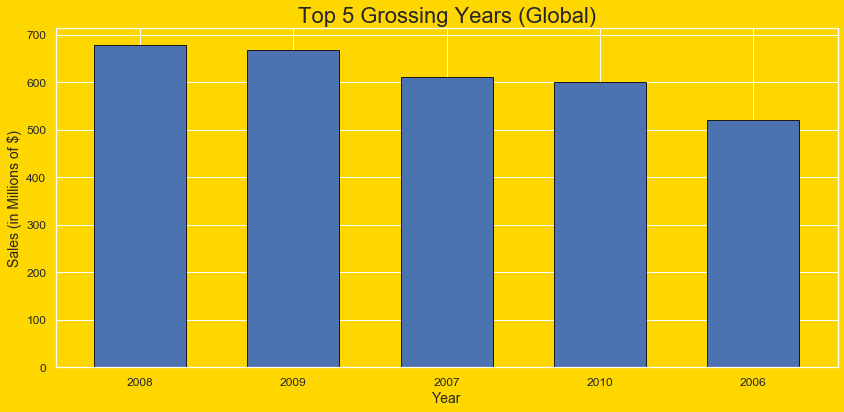

In [93]:
plt.figure(figsize=(12,6), facecolor='gold')
top_sales_yearGB.plot(kind='bar', width=0.6, edgecolor='k')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales (in Millions of $)', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title('Top 5 Grossing Years (Global)', fontsize=22)
plt.tight_layout()
plt.show()

In [94]:
top_sales_yearNA = df.groupby(['Year'])['NA_Sales'].sum().sort_values(ascending=False).head(5)
top_sales_yearNA

Year
2008   351.44
2009   338.85
2007   311.18
2010   304.24
2006   263.12
Name: NA_Sales, dtype: float64

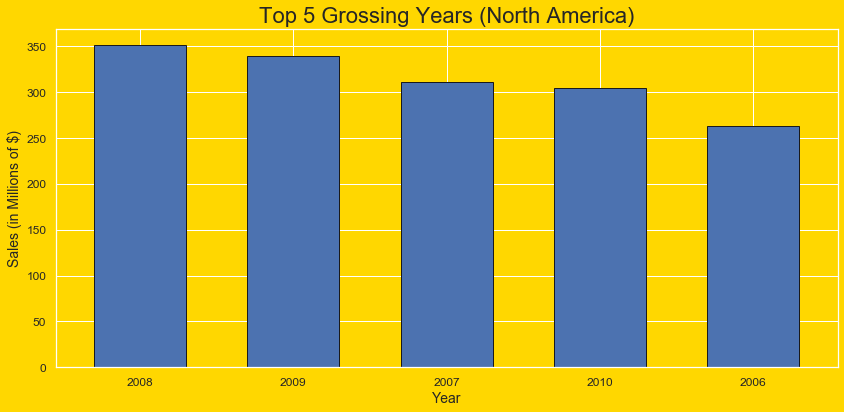

In [95]:
plt.figure(figsize=(12,6), facecolor='gold')
top_sales_yearNA.plot(kind='bar', width=0.6, edgecolor='k')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales (in Millions of $)', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title('Top 5 Grossing Years (North America)', fontsize=22)
plt.tight_layout()
plt.show()

In [96]:
top_sales_yearEU = df.groupby(['Year'])['EU_Sales'].sum().sort_values(ascending=False).head(5)
top_sales_yearEU

Year
2009   191.59
2008   184.40
2010   176.57
2011   167.31
2007   160.18
Name: EU_Sales, dtype: float64

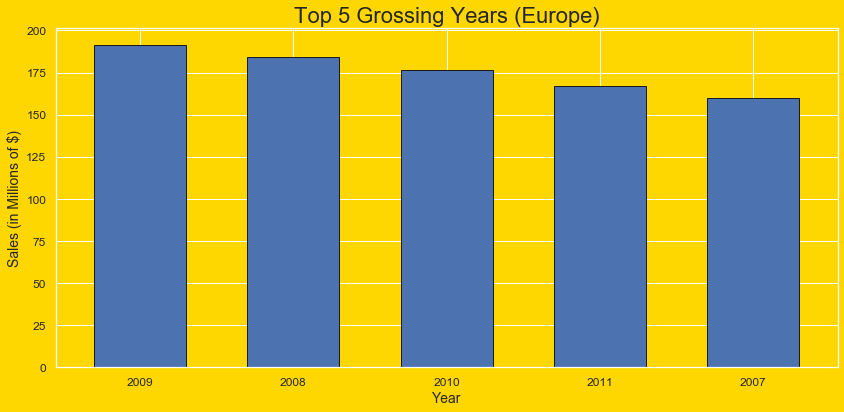

In [97]:
plt.figure(figsize=(12,6), facecolor='gold')
top_sales_yearEU.plot(kind='bar', width=0.6, edgecolor='k')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales (in Millions of $)', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title('Top 5 Grossing Years (Europe)', fontsize=22)
plt.tight_layout()
plt.show()

In [98]:
top_sales_yearJP = df.groupby(['Year'])['JP_Sales'].sum().sort_values(ascending=False).head(5)
top_sales_yearJP

Year
2006   73.73
2009   61.89
2007   60.29
2008   60.26
2010   59.49
Name: JP_Sales, dtype: float64

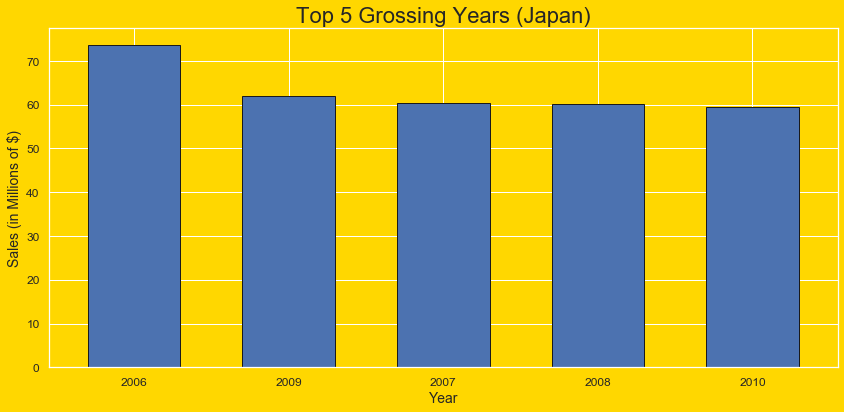

In [99]:
plt.figure(figsize=(12,6), facecolor='gold')
top_sales_yearJP.plot(kind='bar', width=0.6, edgecolor='k')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales (in Millions of $)', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title('Top 5 Grossing Years (Japan)', fontsize=22)
plt.tight_layout()
plt.show()

In [100]:
top_sales_yearOT = df.groupby(['Year'])['Other_Sales'].sum().sort_values(ascending=False).head(5)
top_sales_yearOT

Year
2008   82.39
2007   77.58
2009   74.77
2010   59.90
2006   54.43
Name: Other_Sales, dtype: float64

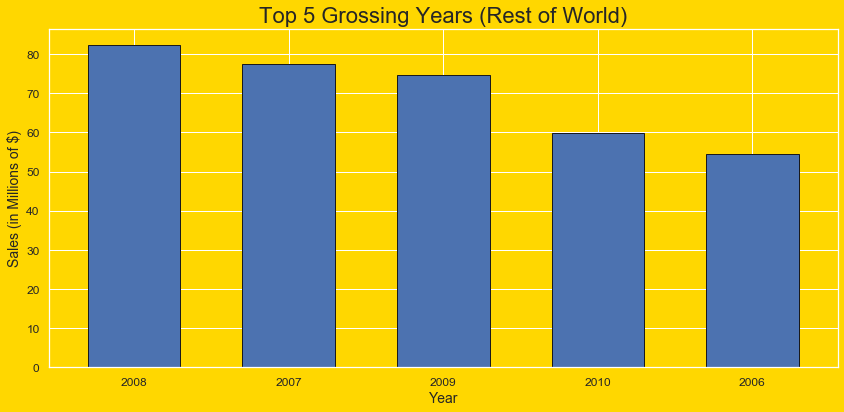

In [101]:
plt.figure(figsize=(12,6), facecolor='gold')
top_sales_yearOT.plot(kind='bar', width=0.6, edgecolor='k')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Sales (in Millions of $)', fontsize=14)
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title('Top 5 Grossing Years (Rest of World)', fontsize=22)
plt.tight_layout()
plt.show()